## Classificação e Interpretação de Variáveis com Regressão Logística e SHAP

### Objetivo
Implementar um modelo de classificação usando Regressão Logística e interpretar as contribuições
das variáveis para o modelo usando SHAP values.

### Exploração e Preparação dos Dados:

In [1]:
# Importação das bibliotecas necessárias

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import shap
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Exemplo de como carregar o conjunto de dados Breast Cancer Wisconsin da biblioteca sklearn

dados = load_breast_cancer()
X = pd.DataFrame(dados.data, columns = dados.feature_names)
y = pd.Series(dados.target, name = "diagnosis") # 0 = Maligno, 1 = Benigno

In [ ]:
y

,diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [3]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
# Vamos ter de normalizar certas colunas de X, por possuir certas variáveis com valores discrepantes
# A normalização deve ser feita separadamente no conjunto de dados de treino e no de teste
# O scaler deve ser ajustado (fit) apenas no conjunto de dados de treino, e transformado (transform) tanto no conjunto de treino quanto no de teste. Isso é para não "vazarmos" informações do conjunto de teste para o de treino
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

### Modelo

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score, confusion_matrix

model = LogisticRegression()
model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)

# Calcular métricas importantes
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Sklearn ordena a matriz de confusão em [0, 1] tanto nas linhas quanto nas colunas. Usamos labels = [1, 0] para inverter isso e ficar na ordem [1, 0] nas linhas e colunas da matriz
confusion_matrix = confusion_matrix(y_test, y_pred, labels = [1, 0])

print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matriz de confusão: \n {confusion_matrix}")

print("Verdadeiros Positivos: ", confusion_matrix[0, 0])
print("Falsos Positivos: ", confusion_matrix[1, 0])
print("Verdadeiros Negativos: ", confusion_matrix[1, 1])
print("Falsos Negativos: ", confusion_matrix[0, 1])

Precisão: 0.9459
Recall: 0.9859
F1-Score: 0.9655
Matriz de confusão: 
 [[70  1]
 [ 4 39]]
Verdadeiros Positivos:  70
Falsos Positivos:  4
Verdadeiros Negativos:  39
Falsos Negativos:  1


In [ ]:
print("Taxa de VP: ", confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1]))
print("Taxa de FP: ", confusion_matrix[1, 0] / (confusion_matrix[1, 0] + confusion_matrix[1, 1]))

Taxa de VP:  0.9069767441860465
Taxa de FP:  0.014084507042253521


In [6]:
# Curva ROC
y_probs = model.predict_proba(X_test_norm)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"AUC - ROC Score: {roc_auc:.2f}")

AUC - ROC Score: 1.00


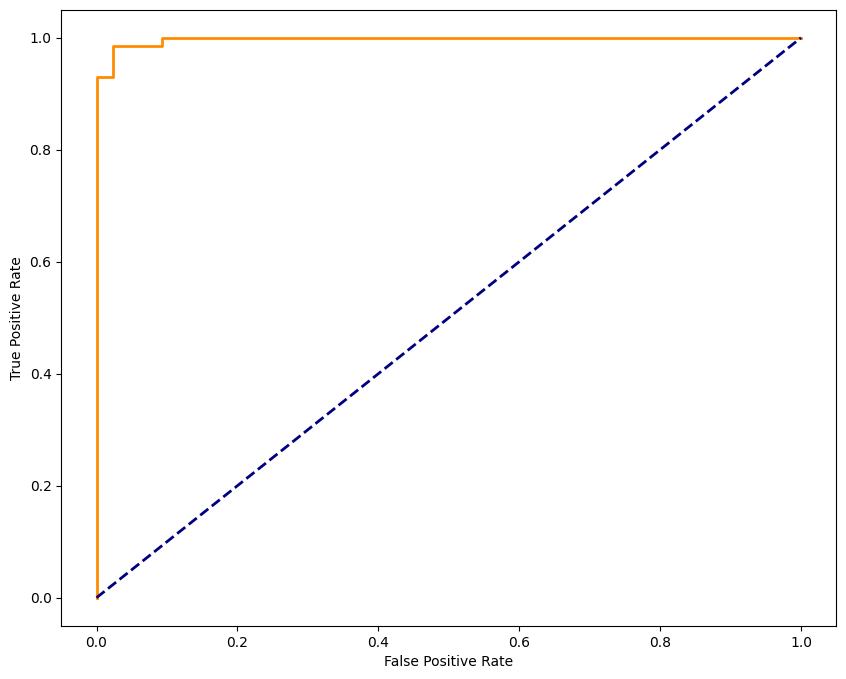

In [7]:
# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### SHAP values

Antes de plotar os gráficos SHAP, precisamos ter em mente:
O gráfico representa o quanto um parâmetro influencia em prever uma classe ou outra de nosso modelo.  

**Magnitude e Sinal dos SHAP Values:**  
Parâmetro com valor negativo: ele "empurra" a probabilidade em direção a classe oposta ou com probabilidade 0.

Parâmetro com valor positivo: ele "empurra" a probabilidade em direção a classe-alvo com probabilidade 1.
Quanto maior a barra de uma variável, maior sua magnitude e sua influência em certa classe a depender do sinal.  

No nosso caso:
Classe 0 representa câncer maligno, e 1 benigno.

**Expected Value (Valor Esperado)**:
No gráfico waterfall de SHAP, o valor E[f(x)], também
conhecido como o base value ou valor esperado, representa a previsão média do
modelo para o conjunto de dados.  
O valor f(x), exibido no topo, representa a previsão
final do modelo para a observação específica em análise

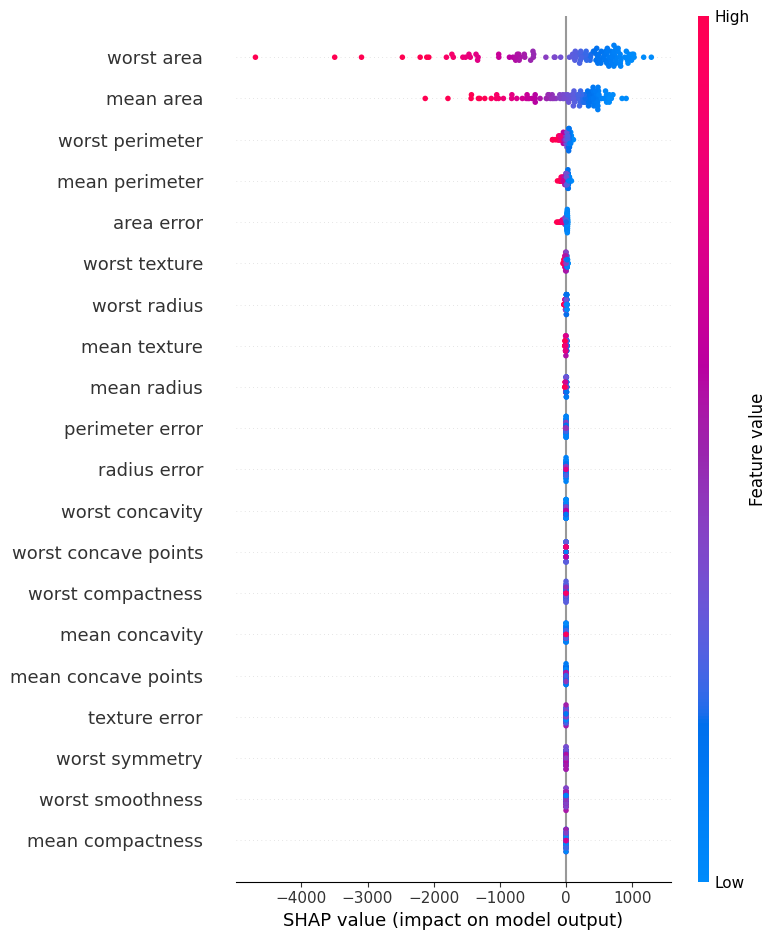


Interpretação para o exemplo 1:


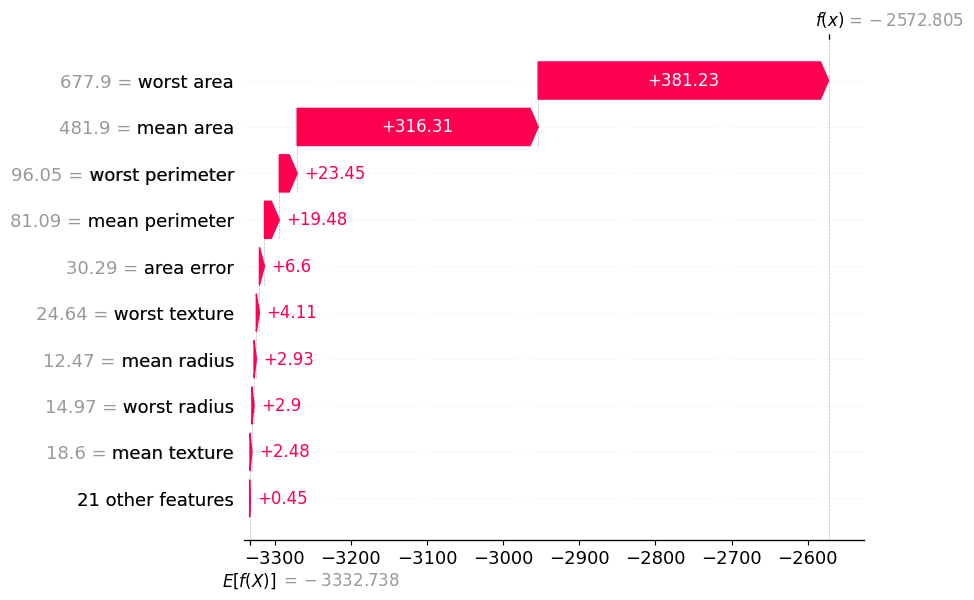


Interpretação para o exemplo 2:


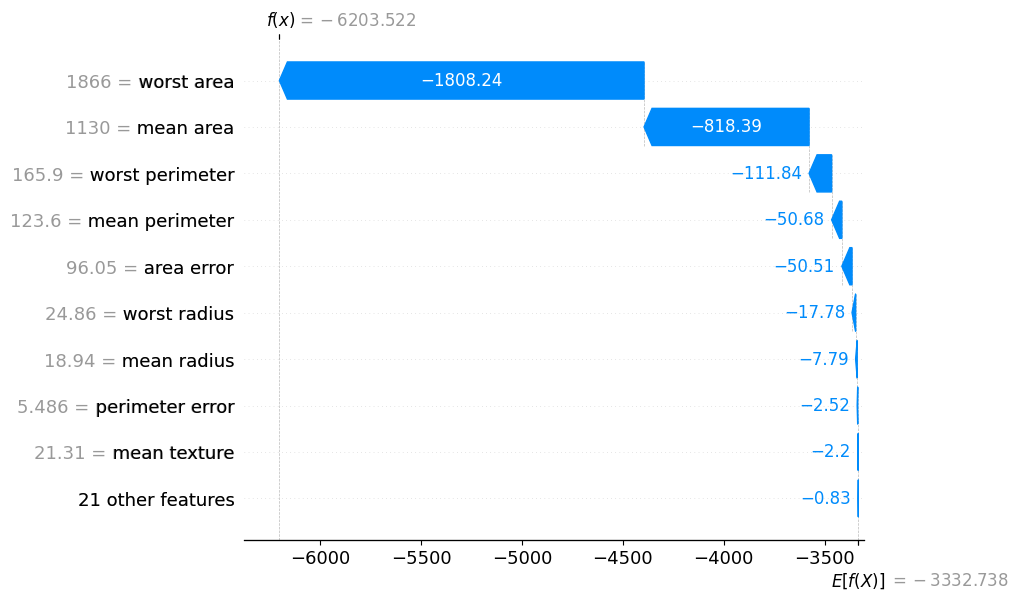


Interpretação para o exemplo 3:


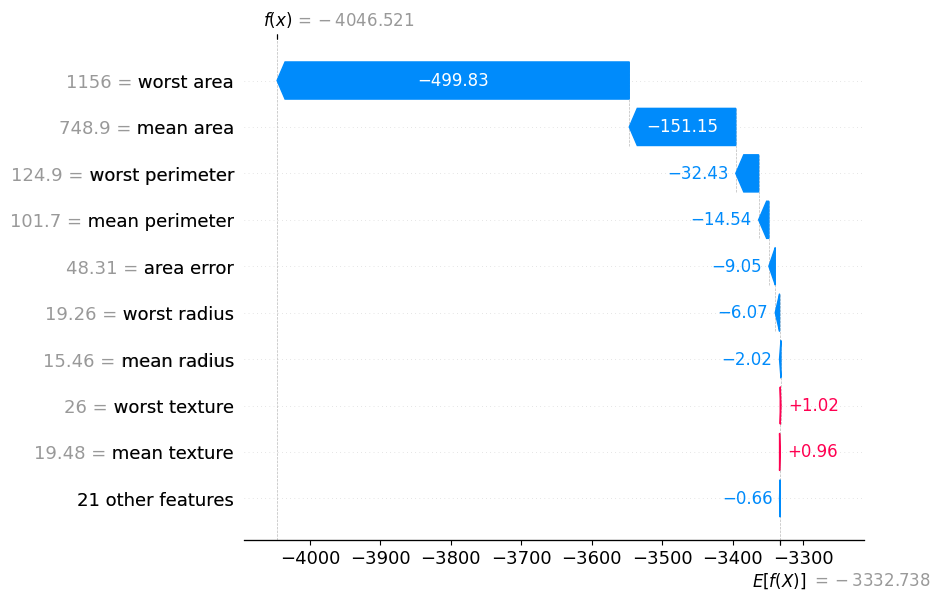

In [36]:
# Inicializando o Explainer SHAP para o modelo de Regressão Logística
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot SHAP summary para entender a importância geral das variáveis
shap.summary_plot(shap_values, X_test)

# Análise detalhada para três exemplos de câncer
for i in range(3):
  print(f"\nInterpretação para o exemplo {i+1}:")
  shap.initjs()
  shap.waterfall_plot(shap_values[i])

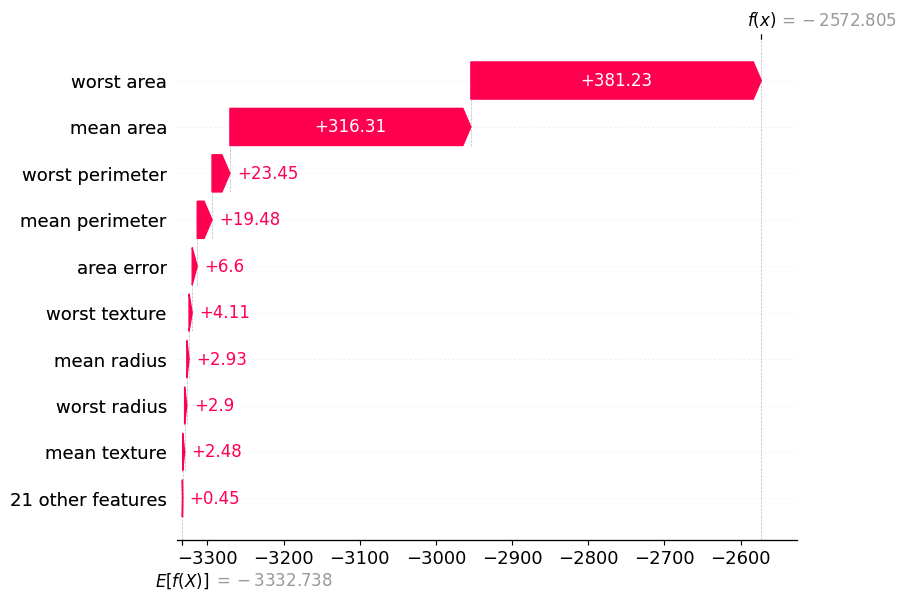

In [35]:
#Visualizing each feature's impact on decision using waterfall plot
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values.values[0], feature_names = X_test.columns)

A partir dos valores obtidos com as variáveis, podemos ver que os parâmetros 'worst_area' e 'mean_area' são os que mais influenciam o modelo a classificar uma amostra como benigna (1) ou maligna (0).  
Essa análise faz sentido, pois temos o seguinte significado dessas variáveis:  

**mean_area**:  
    Descrição: Representa a área média dos núcleos das células nos agregados presentes na amostra.
  
**worst_area**:  
    Descrição: Refere-se à maior (ou "pior") medição da área dos núcleos das células entre os agregados, baseada em métricas como a média de três desvios padrão mais elevados das medições.  

Visto que a área e o tamanho de uma célula estão diretamente relacionadas ao tumor ser benigno ou maligno, faz total sentido essas duas variáveis serem as que mais impactam o modelo a classificar uma amostra como 1 ou 0, respectivamente.